<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Taller_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Regresión Lineal**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Juan Diego Moreno
- Dairon Ferney Reina

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 29 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

Contexto: Tu Primer Proyecto en AutoAnalitica 📈 🚗

¡Felicitaciones! Has sido contratado como Científico de Datos Junior en AutoAnalitica, una firma de consultoría líder que asesora a grandes concesionarios de autos usados en el país.

Tu primer proyecto es construir un prototipo de modelo de pricing inteligente. La gerencia de uno de nuestros clientes principales está preocupada porque sus agentes de ventas tasan los vehículos que reciben basándose únicamente en su intuición, lo que genera precios inconsistentes y pérdida de oportunidades.

El objetivo: Desarrollar un modelo de machine learning que pueda predecir el precio de venta justo de un automóvil basándose en sus características (antigüedad, kilómetros recorridos, tipo de combustible, etc.). Esta herramienta no busca reemplazar al vendedor, sino darle un precio base, basado en datos, para hacer ofertas más rápidas, justas y competitivas. Tu misión hoy es construir el primer modelo base y evaluar su precisión.

# 1. Importar librerías necesarias

In [81]:
### TU CÓDIGO AQUÍ ###
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelamiento
import statsmodels.api as sm  # Para el enfoque econométrico (inferencia)
from sklearn.datasets import fetch_california_housing # Dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.linear_model import LinearRegression # Modelo de ML (predicción)
from sklearn.metrics import mean_squared_error, r2_score # Métricas de evaluación

# Pruebas de Supuestos
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Mejorar visualización de dataframes y gráficos

In [82]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Cargar el dataset `car data.csv`.

- Car_Name: The name of each car.
- Year: The year that the car was bought.
- Selling_Price: The price that the car has at the sale time (thousands of USD). Esta es la variable objetivo.
- Present_Price: The price that car has right now (thousands of USD).
- Kms_Driven: The number of kilometers that the car is driven.
- Fuel_Type: The type of fuel that the car consumes.
- Seller_Type: The type of car seller: individual or dealer.
- Transmission: The type of the car gear: manual or automatic.
- Owner: The number of previous owners of the car.

In [83]:
from os import path
# Carga el dataset
### TU CÓDIGO AQUÍ ###
path = '/content/'
os.chdir(path)
df = pd.read_csv('car data.csv')

In [84]:
# Mostrar las primeras filas para entender la estructura
### TU CÓDIGO AQUÍ ###
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# 3. Análisis Exploratorio de Datos (EDA) y preparación de datos

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [86]:
# Revisa si hay filas duplicadas y elíminalas
### TU CÓDIGO AQUÍ ###
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [87]:
# Muestras las estadísticas descriptivas
### TU CÓDIGO AQUÍ ###
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,"2,013.62",4.59,7.54,"36,916.75",0.04
std,2.90,4.98,8.57,"39,015.17",0.25
min,"2,003.00",0.10,0.32,500.00,0.00
25%,"2,012.00",0.85,1.20,"15,000.00",0.00
50%,"2,014.00",3.51,6.10,"32,000.00",0.00
75%,"2,016.00",6.00,9.84,"48,883.50",0.00
max,"2,018.00",35.00,92.60,"500,000.00",3.00


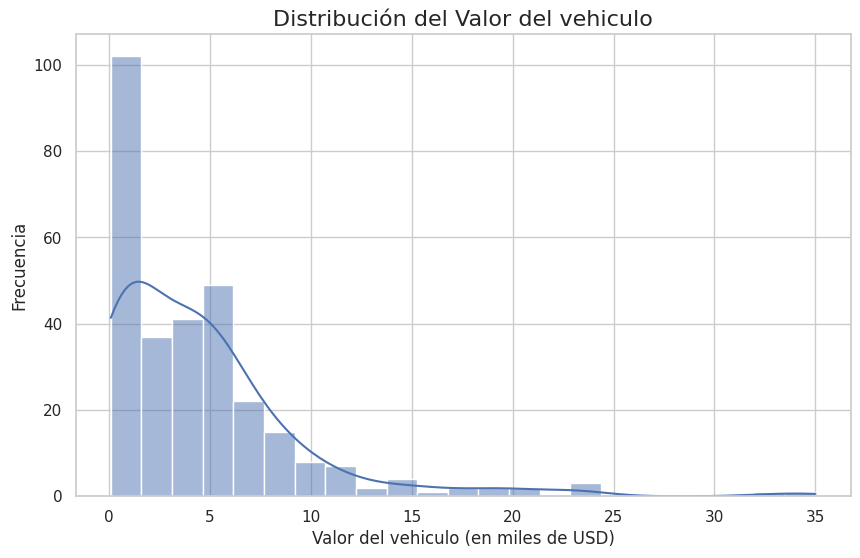

In [88]:
# Grafica un histograma para ver la distribución de la variable independiente "Selling_Price"
### TU CÓDIGO AQUÍ ###
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribución del Valor del vehiculo', fontsize=16)
plt.xlabel('Valor del vehiculo (en miles de USD)')
plt.ylabel('Frecuencia')
plt.show()

Escribe tus conclusiones aquí.

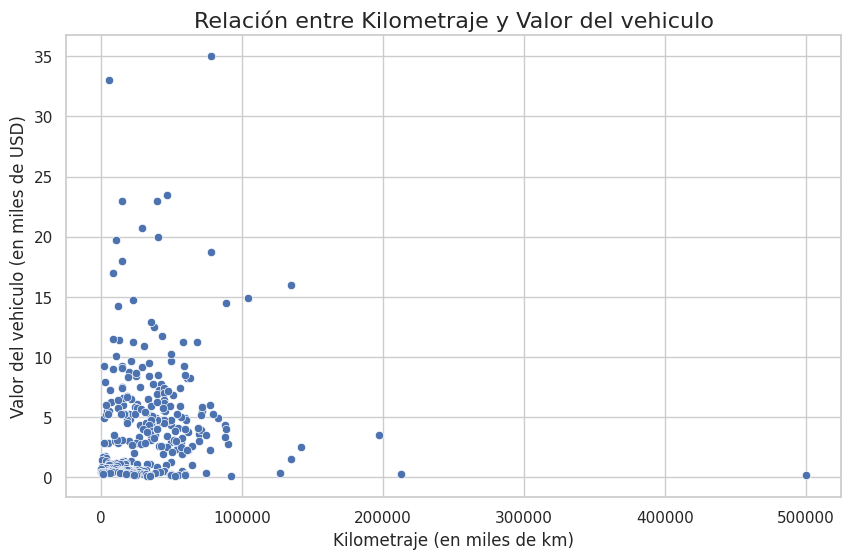

In [89]:
# Visualiza la relación entre 'Kms_Driven' y 'Selling_Price'
### TU CÓDIGO AQUÍ ###
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df)
plt.title('Relación entre Kilometraje y Valor del vehiculo', fontsize=16)
plt.xlabel('Kilometraje (en miles de km)')
plt.ylabel('Valor del vehiculo (en miles de USD)')
plt.show()

Basado en el gráfico, ¿qué tipo de relación observas? ¿Es lo que esperabas económicamente?

In [90]:
# Crea la variable "Car_Age" que será la resta entre el año actual y el año del carro
### TU CÓDIGO AQUÍ ###
df['Car_Age'] = 2025 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [91]:
# Elimina la columna 'Car_Name' que no usaremos
### TU CÓDIGO AQUÍ ###
df.drop('Car_Name', axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


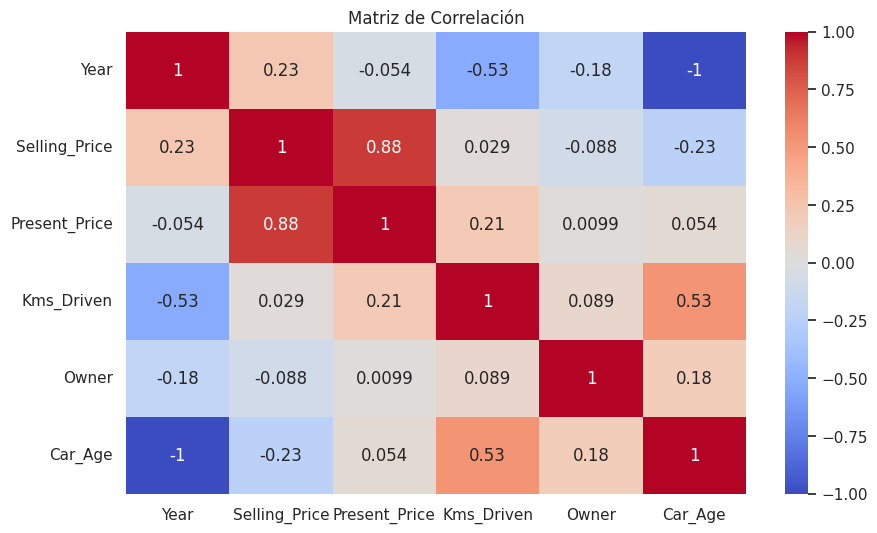

In [92]:
# Calcula la matriz de correlación para las variables numéricas y grafica el heatmap
### TU CÓDIGO AQUÍ ###
numeric_df = df.select_dtypes(include=[np.number]) # Select only numeric columns
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Escribe tus conclusiones aquí.

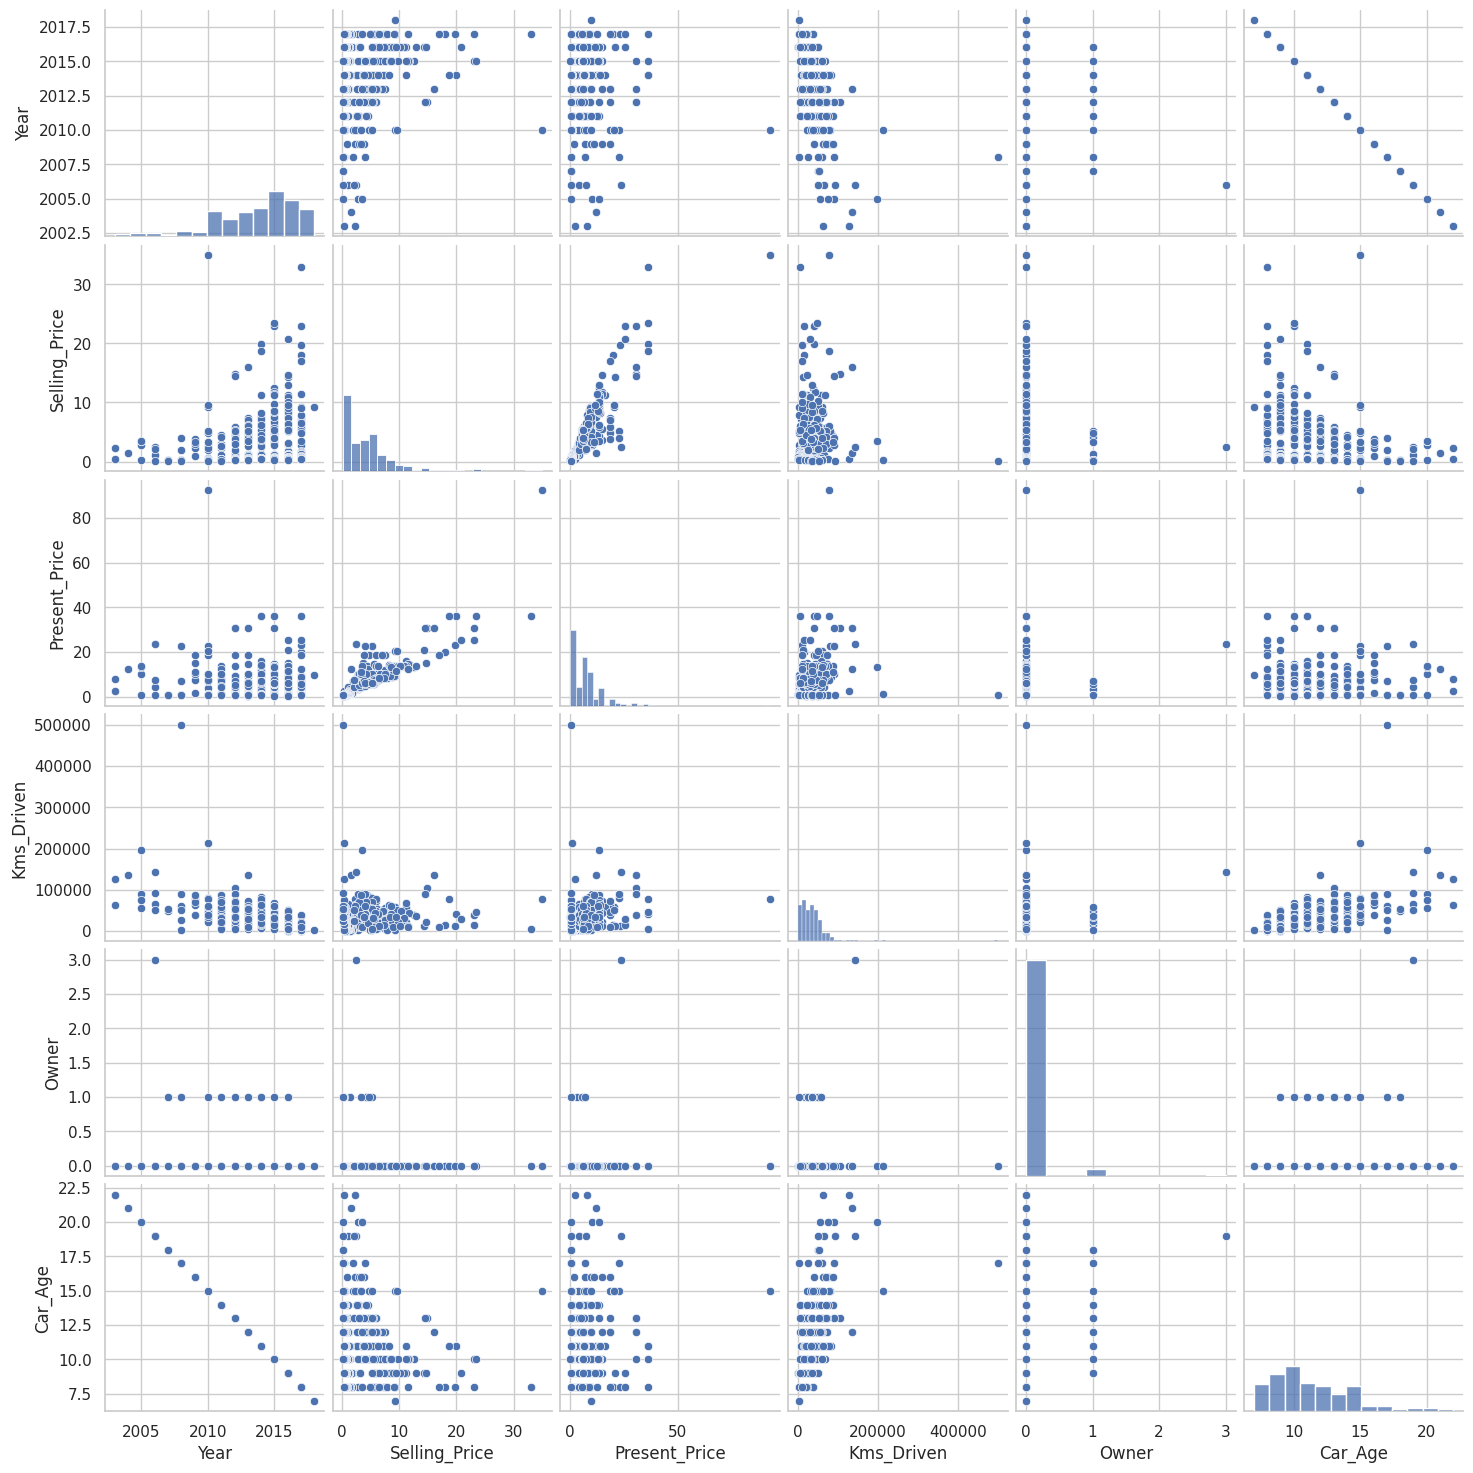

In [93]:
# Realiza un gráfico de pairplot para ver el comportamiento de las variables independientes y la dependiente
### TU CÓDIGO AQUÍ ###
sns.pairplot(df)
plt.show()

Escribe tus conclusiones aquí.

In [94]:
# Convierte variables categóricas a numéricas para que el modelo las entienda.
# La regresión lineal no puede trabajar con texto ('Petrol', 'Dealer').
# Usaremos One-Hot Encoding con pd.get_dummies() para convertirlas.
# drop_first=True es importante para evitar multicolinealidad perfecta en las variables dummy
### TU CÓDIGO AQUÍ ###
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True, dtype= int)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,11,0,1,0,1
1,2013,4.75,9.54,43000,0,12,1,0,0,1
2,2017,7.25,9.85,6900,0,8,0,1,0,1
3,2011,2.85,4.15,5200,0,14,0,1,0,1
4,2014,4.60,6.87,42450,0,11,1,0,0,1


In [95]:
df.drop('Fuel_Type_Diesel', axis=1, inplace=True)
df.rename(columns={'Fuel_Type_Petrol': 'Fuel_Type', 'Seller_Type_Individual': 'Seller_Type', 'Transmission_Manual': 'Transmission'}, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,0,11,1,0,1
1,2013,4.75,9.54,43000,0,12,0,0,1
2,2017,7.25,9.85,6900,0,8,1,0,1
3,2011,2.85,4.15,5200,0,14,1,0,1
4,2014,4.60,6.87,42450,0,11,0,0,1


# 4. Construcción y Evaluación del Modelo

In [96]:
# Define tus variables X e y
### TU CÓDIGO AQUÍ ###
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [97]:
# Divide los datos en entrenamiento y prueba (80% / 20%)
### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del dataset original: {X.shape[0]} filas")
print(f"Tamaño del set de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del set de prueba: {X_test.shape[0]} filas")

Tamaño del dataset original: 299 filas
Tamaño del set de entrenamiento: 239 filas
Tamaño del set de prueba: 60 filas


In [98]:
# Entrena el modelo de Regresión Lineal
### TU CÓDIGO AQUÍ ###
modelo_ml = LinearRegression()
modelo_ml.fit(X_train, y_train)

LinearRegression()

In [103]:
# Realiza predicciones sobre el conjunto de prueba
### TU CÓDIGO AQUÍ ###
predicciones = modelo_ml.predict(X_test)

In [104]:
# Calcula las métricas de evaluación (RMSE y R2) para entrenamiento y prueba y compáralas
### TU CÓDIGO AQUÍ ###
predicciones_train = modelo_ml.predict(X_train)
predicciones_test = modelo_ml.predict(X_test)

In [105]:
# Calculamos las métricas de desempeño para entrenamiento
mse_train = mean_squared_error(y_train, predicciones_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, predicciones_train)
print(f"Métricas de Desempeño sobre el Conjunto de Entranamiento:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse_train:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2_train:.4f}")

Métricas de Desempeño sobre el Conjunto de Entranamiento:
-------------------------------------------------
Error Cuadrático Medio (MSE): 2.3478
Raíz del Error Cuadrático Medio (RMSE): 1.5322
Coeficiente de Determinación (R-cuadrado): 0.9042


In [107]:
# Calculamos las métricas de desempeño para prueba
mse_test = mean_squared_error(y_test, predicciones_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, predicciones_test)

print(f"Métricas de Desempeño sobre el Conjunto de Prueba:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse_test:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2_test:.4f}")

Métricas de Desempeño sobre el Conjunto de Prueba:
-------------------------------------------------
Error Cuadrático Medio (MSE): 6.4785
Raíz del Error Cuadrático Medio (RMSE): 2.5453
Coeficiente de Determinación (R-cuadrado): 0.7486


# 5. Conclusión para el Cliente

*Escribe un párrafo para los gerentes de 'AutoAnalitica'.*

1. Empieza explicando qué es el RMSE en términos sencillos (ej. "nuestro modelo se equivoca en promedio en..."). Recuerda que el precio en el dataset está en miles de dólares.

Nuesto modelo se equivoca en promedio $2.545 dolares, osea que al momento de hacer las inpretaciónes de nuestra regresión lineal este podría ser nuestro error, un ejemplo es la estimación de una vivienda con un valor de $210.000 dolares, el desface es del intervalo (207.455, 212.545).

2. Termina dando tu recomendación: ¿Es este modelo lo suficientemente bueno como un primer paso? ¿Para qué podría ser útil?

El modelo si es util ya que posee una capacidad suficiente de explicarnos el comportamiento de el valor de la vivienda y las caracteristicas que lo conforma con su R cuadrado del 75%, ademas esto nos indica una capacidad real que el modelo de maching learning haga una predicción acertada de comportamiento y el impacto de las diferentes variables en el precio.